# Lab Assignment - 1
**2022-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 29-08-2022   2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, uploading a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TAs:

Armaan Garg, 2019csz0002@iitrpr.ac.in	

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab1.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab1 then you should name the colab file as: ABC_2022csx1234_lab1.ipynb


**In this assignment, you will implement the Value Iteration, Policy Iteration and Monte Carlo Prediction. The assignment will focus on two openai Gym environments namely FrozenLake8x8-v0 and Taxi-v3 along with some real-world inspired problems.**

# Note: The Notebook was run on Jupyter Notebook as some rendering functions were failing on Colab due to updates in libraries, requested to check assignment on Jupyter Notebook

In [1]:
!pip install gym

You should consider upgrading via the 'c:\anaconda\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install gym[toy_text]

You should consider upgrading via the 'c:\anaconda\python.exe -m pip install --upgrade pip' command.


## QUESTION - 1
Q1. **Value Iteration**: Implement Value Iteration algorithm for the FrozenLake8x8-v0 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding number of iterations till convergances on y-axis for both the environments.
In another graph, plot the value function of the start state ($s_0$) for each value of $\gamma$ for the FrozenLake. In case of taxi environment select the max norm over the value function for comparison.

Write your observations from these plots. Does the different values of $\gamma$ result in the same policy for each envrionemnt? Briefly discuss based on your observations. **[ 20 points]**


# Frozen lake environment
Environment 1: Understanding FrozenLake8x8


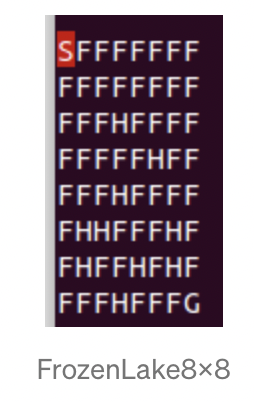


There are 64 states in the game. The agent starts from S (S for Start) and our goal is to get to G (G for Goal). The agent in the environment has four possible moves — Up, Down, Left and Right. 

So just go. Nope. It's a slippery surface. The F’s and the H’s in between are pretty weird stuff. So F means Frozen Surface. You can walk on them. But H means Hole. If you fall in a H, BOoom, GAME OVER for you and start from S again. So just go through all the F’s dodging the H’s to reach the G right. 

And there’s more. Since this is a “Frozen” Lake, so if you go in a certain direction, there is only a 0.333% chance that the agent will really go in that direction. I mean, the movement of the agent is uncertain and only partially depends on the chosen direction. So you won’t always move in the direction you intend. For a more detailed explanation of FrozenLake8x8 , https://gym.openai.com/envs/FrozenLake8x8-v0/

In [3]:
#importing libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd #for printing table like
np.random.seed(0)

# Library Versions Used

In [4]:
print(gym.__version__)
print(np.__version__)
print(pd.__version__)

0.25.2
1.19.2
1.3.2


In [5]:
def value_iteration(env, max_iterations=100000, gamma=0.99, eps = 1e-12):  
  """Function implmenting the value iteration algorithm
  env : is any openai gym env
  max_iterations : limits total iterations (default 1e5)
  gamma: discount factor (default 0.99)
  eps : value to check if there's any significant change in state values (default 1e-12)
  Returns: Value, number of iterations, policy, time_taken"""
  start_time = time.time()
  V = np.zeros(env.observation_space.n)
  for iteration in range(max_iterations):    
    delta = 0
    for i in range(len(V)):
      v = V[i]
      newVal = -1;
      for action in range(0, env.action_space.n):
        expected_reward = 0
        for possibility in env.env.P[i][action]:
          prob = possibility[0]
          s_ = possibility[1]
          r  = possibility[2]      
          expected_reward += prob * (r + gamma * V[s_])
        newVal = max(newVal, expected_reward)        
      V[i] = newVal
      delta = max(delta, abs(v - V[i]))
    if delta < eps:
      break
  policy = get_policy(env, V, gamma)
  end_time = time.time()
  return V, iteration + 1, policy, end_time - start_time

In [6]:
def get_policy(env, V, gamma=0.99):
  """Extracts the Policy from the Value Function, used as sub-routine in value-iteration  
    For a particular state we calculate the state-action values of all the possible actions from that state 
  and choose the action with the highest state-action value.
  Args: env, V, gamma = 0.99
  Returns a policy"""
  pi = np.zeros(len(env.env.P))
  for i in range(len(V)):
    v = V[i]
    newVal = -1
    policyAction = None
    for action in range(0, env.action_space.n):
      expected_reward = 0
      for possibility in env.env.P[i][action]:
        prob = possibility[0]
        s_ = possibility[1]
        r  = possibility[2]        
        expected_reward += prob * (r + gamma * V[s_])
      if expected_reward > newVal:
        newVal = expected_reward
        policyAction = action
    pi[i] = policyAction
  return pi

In [7]:
env_frozen = gym.make('FrozenLake8x8-v1', new_step_api = True, render_mode = 'ansi')

In [8]:
state = env_frozen.reset()
start_display = env_frozen.render()
print(start_display[0])


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



In [9]:
env_frozen.env.P[6][0] #denotes in state 6, what could happen if i take action 0

[(0.3333333333333333, 6, 0.0, False),
 (0.3333333333333333, 5, 0.0, False),
 (0.3333333333333333, 14, 0.0, False)]

In [10]:
V_frozen, iterations_frozen, policy_frozen, time_frozen = value_iteration(env_frozen)

In [11]:
V_frozen

array([0.41464036, 0.42720522, 0.44614822, 0.46832037, 0.49244371,
       0.51656983, 0.53526151, 0.54097522, 0.41168642, 0.42120783,
       0.43749572, 0.45838855, 0.48324013, 0.51353178, 0.54576786,
       0.55736841, 0.39675209, 0.39384054, 0.37549627, 0.        ,
       0.42167799, 0.49381921, 0.56121207, 0.5858589 , 0.36927228,
       0.35298254, 0.30653123, 0.20040371, 0.30075275, 0.        ,
       0.56901589, 0.62825904, 0.33266395, 0.29137537, 0.19730918,
       0.        , 0.28929026, 0.36195181, 0.53481945, 0.68969732,
       0.30613635, 0.        , 0.        , 0.08627639, 0.2139326 ,
       0.27271394, 0.        , 0.77203552, 0.2888856 , 0.        ,
       0.05769641, 0.04751102, 0.        , 0.25052148, 0.        ,
       0.87776874, 0.28038897, 0.20081512, 0.12732657, 0.        ,
       0.23959086, 0.48644206, 0.7371033 , 0.        ])

In [12]:
iterations_frozen

534

In [13]:
# displaying values for each state
for i in range(8):
  for j in range(8):
    print("{0:0.4f}".format(V_frozen[j + i * 8]), end = ' ')
  print('\n')

0.4146 0.4272 0.4461 0.4683 0.4924 0.5166 0.5353 0.5410 

0.4117 0.4212 0.4375 0.4584 0.4832 0.5135 0.5458 0.5574 

0.3968 0.3938 0.3755 0.0000 0.4217 0.4938 0.5612 0.5859 

0.3693 0.3530 0.3065 0.2004 0.3008 0.0000 0.5690 0.6283 

0.3327 0.2914 0.1973 0.0000 0.2893 0.3620 0.5348 0.6897 

0.3061 0.0000 0.0000 0.0863 0.2139 0.2727 0.0000 0.7720 

0.2889 0.0000 0.0577 0.0475 0.0000 0.2505 0.0000 0.8778 

0.2804 0.2008 0.1273 0.0000 0.2396 0.4864 0.7371 0.0000 



In [14]:
action_map = {0:"L", 1:"D", 2:"R", 3:"U"}

In [15]:
# displaying optimal actions for each state
for i in range(8):
  for j in range(8):
    print(f"{action_map[int(policy_frozen[j + i * 8])]}", end = ' ')
  print('\n')

U R R R R R R R 

U U U U U R R D 

U U L L R U R D 

U U U D L L R R 

L U L L R D U R 

L L L D U L L R 

L L D L L L L R 

L D L L D R D L 



In [16]:
done = None
steps = 0
print(start_display[0])
while done != True:    
    steps+=1
    action = policy_frozen[int(state)]
    state, reward, done, info, _ = env_frozen.step(int(action)) #in new version step gives out 5 values
    temp = env_frozen.render()
    print(temp[0])
    if(done and state != 63):
      print('Sad! Now Agent has to restart')
      state = env_frozen.reset()
      temp = env_frozen.render()
      print(temp[0])      
      done = False
print("Number of steps used, including restarting if fallen in hole = ", steps)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFF

### Value Iteration Convergence Analysis using different gamma for Frozen Lake Environment

In [17]:
gammas = [0.1,0.3,0.5,0.7, 0.99]

In [18]:
env_frozen = gym.make('FrozenLake8x8-v1', new_step_api = True, render_mode = 'rgb_array')
env_frozen.reset()
num_iterations_frozen = []
start_vals_frozen = []
policies_frozen = []
times_frozen = []
for gamma in gammas:
  val, iterations, policy, time_taken = value_iteration(env_frozen, gamma = gamma)
  num_iterations_frozen.append(iterations)
  start_vals_frozen.append(val[0])
  policies_frozen.append(policy)
  times_frozen.append(time_taken)

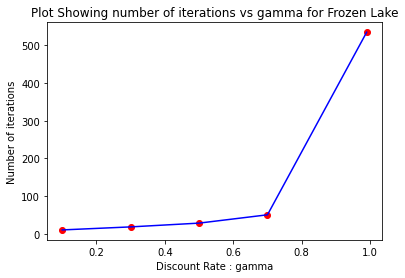

In [19]:
plt.plot(gammas, num_iterations_frozen,'bo', color = 'red')
plt.plot(gammas, num_iterations_frozen, color = 'blue')
plt.title('Plot Showing number of iterations vs gamma for Frozen Lake')
plt.xlabel('Discount Rate : gamma')
plt.ylabel('Number of iterations')
plt.show()

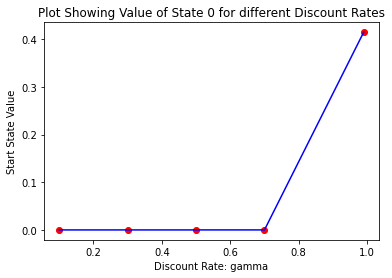

In [20]:
plt.plot(gammas, start_vals_frozen, 'bo', color = 'red')
plt.plot(gammas, start_vals_frozen, color = 'blue')
plt.title('Plot Showing Value of State 0 for different Discount Rates')
plt.xlabel('Discount Rate: gamma')
plt.ylabel('Start State Value')
plt.show()

# Taxi environement
Description:
There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

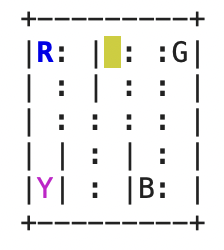

Observations: 
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations. 

Passenger locations:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
- 4: in taxi

Destinations:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
    
Actions:
There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

Rewards: 
There is a default per-step reward of -1,
except for delivering the passenger, which is +20,
or executing "pickup" and "drop-off" actions illegally, which is -10.


Rendering:
- blue: passenger
- magenta: destination
- yellow: empty taxi
- green: full taxi
- other letters (R, G, Y and B): locations for passengers and destinations


state space is represented by:
    (taxi_row, taxi_col, passenger_location, destination)

https://gym.openai.com/envs/Taxi-v3/

In [21]:
env_taxi = gym.make("Taxi-v3", render_mode = 'ansi',new_step_api = True)

In [22]:
state = env_taxi.reset()
start_display = env_taxi.render()
print(start_display[0])

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [23]:
V_taxi, iterations_taxi, policy_taxi, time_taxi = value_iteration(env_taxi)

In [24]:
V_taxi

array([944.72361809, 864.01317574, 903.55733909, 873.75068256,
       789.53804327, 864.01317574, 789.53804327, 816.7669381 ,
       864.01317574, 826.0272102 , 903.55733909, 835.3810204 ,
       807.59926872, 826.0272102 , 807.59926872, 873.75068256,
       955.27638191, 873.75068256, 913.69428191, 883.58654804,
       934.27638191, 854.37304398, 893.5217657 , 864.01317574,
       798.52327603, 873.75068256, 798.52327603, 826.0272102 ,
       854.37304398, 816.7669381 , 893.5217657 , 826.0272102 ,
       816.7669381 , 835.3810204 , 816.7669381 , 883.58654804,
       944.72361809, 883.58654804, 903.55733909, 893.5217657 ,
       883.58654804, 807.59926872, 844.82931354, 816.7669381 ,
       844.82931354, 923.93361809, 844.82931354, 873.75068256,
       844.82931354, 807.59926872, 883.58654804, 816.7669381 ,
       826.0272102 , 844.82931354, 826.0272102 , 893.5217657 ,
       893.5217657 , 934.27638191, 893.5217657 , 903.55733909,
       873.75068256, 798.52327603, 835.3810204 , 807.59

In [25]:
policy_taxi

array([4., 4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5.,
       0., 0., 0., 3., 3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 4.,
       4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       2., 2., 2., 2., 0., 0., 0., 0., 2., 2., 2., 2., 1., 2., 0., 2., 1.,
       1., 1., 1., 2., 2.

In [26]:
iterations_taxi

1533

In [27]:
done = None
steps = 0
print("State:", state)
print(start_display[0])
while done != True:
    # We simply take the action with the highest Q Value    
    steps+=1
    action = policy_taxi[int(state)]
    state, reward, done, info, _ = env_taxi.step(int(action))
    print("State:", state)
    temp = env_taxi.render()
    print(temp[0])
print("Number of iterations used = ", steps)

State: 368
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


State: 268
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

State: 248
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 228
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 208
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 308
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

State: 408
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

State: 416
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

State: 316
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)

State: 216
+---------+
|R: | : :G|
| : | : : |
|_: : : : 

### Value Iteration Convergence Analysis using different gamma for Taxi Environment

In [28]:
env_taxi = gym.make('Taxi-v3', new_step_api = True, render_mode = 'ansi')
env_taxi.reset()
num_iterations_taxi = []
start_vals_taxi = []
policies_taxi = []
times_taxi = []
for gamma in gammas:
  val, iterations, policy, time_taken = value_iteration(env_taxi, gamma = gamma)
  num_iterations_taxi.append(iterations)
  start_vals_taxi.append(np.max(val))
  policies_taxi.append(policy)
  times_taxi.append(time_taken)

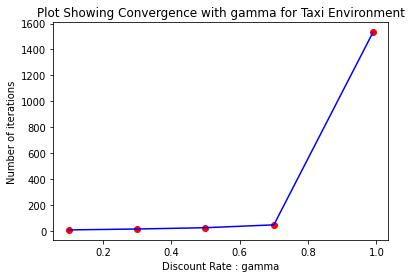

In [29]:
plt.plot(gammas, num_iterations_taxi,'bo', color = 'red')
plt.plot(gammas, num_iterations_taxi, color = 'blue')
plt.title('Plot Showing Convergence with gamma for Taxi Environment')
plt.xlabel('Discount Rate : gamma')
plt.ylabel('Number of iterations')
plt.show()

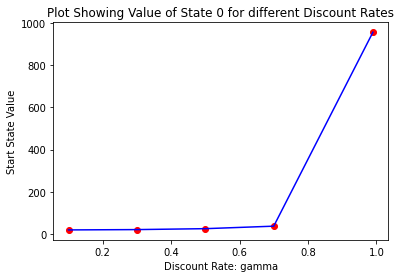

In [30]:
plt.plot(gammas, start_vals_taxi, 'bo', color = 'red')
plt.plot(gammas, start_vals_taxi, color = 'blue')
plt.title('Plot Showing Value of State 0 for different Discount Rates')
plt.xlabel('Discount Rate: gamma')
plt.ylabel('Start State Value')
plt.show()

### Simultaneous Plots for Both Environments

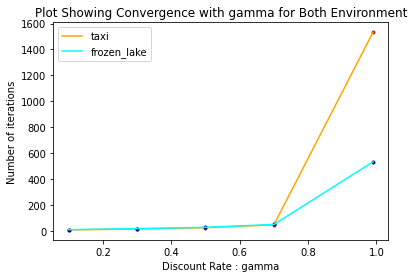

In [31]:
plt.plot(gammas, num_iterations_taxi,'.', color = 'firebrick')
plt.plot(gammas, num_iterations_taxi, color = 'orange', label = 'taxi')
plt.plot(gammas, num_iterations_frozen,'.', color = 'darkblue')
plt.plot(gammas, num_iterations_frozen, color = 'cyan', label = 'frozen_lake')
plt.title('Plot Showing Convergence with gamma for Both Environment')
plt.xlabel('Discount Rate : gamma')
plt.ylabel('Number of iterations')
plt.legend(loc = "upper left")
plt.show()

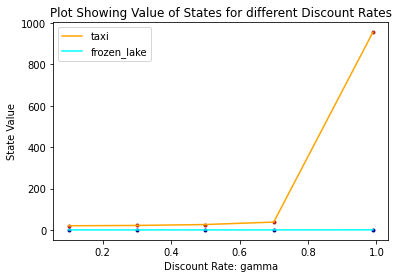

In [32]:
plt.plot(gammas, start_vals_taxi, '.', color = 'firebrick')
plt.plot(gammas, start_vals_taxi, color = 'orange', label = 'taxi')
plt.plot(gammas, start_vals_frozen, '.', color = 'darkblue')
plt.plot(gammas, start_vals_frozen, color = 'cyan', label = 'frozen_lake')
plt.title('Plot Showing Value of States for different Discount Rates')
plt.xlabel('Discount Rate: gamma')
plt.ylabel('State Value')
plt.legend(loc = "upper left")
plt.show()

In [33]:
for i in range(len(gammas)):
  for j in range(i + 1, len(gammas)):
    print(f"{i} vs {j}")
    print(f'{len(policies_frozen[i]) - np.sum(policies_frozen[i] == policies_frozen[j])} values are different')
    if all(policies_frozen[i] == policies_frozen[j]):
      print(f'For Frozen Lake Policy for gamma = {gammas[i]} is same as gamma = {gammas[j]}')
    else:
      print(f'For Frozen Lake Policy for gamma = {gammas[i]} differs from that of gamma = {gammas[j]}')
    print('_________________________________________________________________________________________________')

0 vs 1
10 values are different
For Frozen Lake Policy for gamma = 0.1 differs from that of gamma = 0.3
_________________________________________________________________________________________________
0 vs 2
10 values are different
For Frozen Lake Policy for gamma = 0.1 differs from that of gamma = 0.5
_________________________________________________________________________________________________
0 vs 3
12 values are different
For Frozen Lake Policy for gamma = 0.1 differs from that of gamma = 0.7
_________________________________________________________________________________________________
0 vs 4
18 values are different
For Frozen Lake Policy for gamma = 0.1 differs from that of gamma = 0.99
_________________________________________________________________________________________________
1 vs 2
0 values are different
For Frozen Lake Policy for gamma = 0.3 is same as gamma = 0.5
_________________________________________________________________________________________________
1 vs 

In [34]:
for i in range(len(gammas)):
  for j in range(i + 1, len(gammas)):
    diffVal = len(policies_taxi[i]) - np.sum(policies_taxi[i] == policies_taxi[j])
    print(f'{diffVal} values are different')
    if all(policies_taxi[i] == policies_taxi[j]):
      print(f'For Taxi Policy for gamma = {gammas[i]} is same as gamma = {gammas[j]}')
    else:
      print(f'For Taxi Policy for gamma = {gammas[i]} differs from that of gamma = {gammas[j]}')

471 values are different
For Taxi Policy for gamma = 0.1 differs from that of gamma = 0.3
471 values are different
For Taxi Policy for gamma = 0.1 differs from that of gamma = 0.5
471 values are different
For Taxi Policy for gamma = 0.1 differs from that of gamma = 0.7
471 values are different
For Taxi Policy for gamma = 0.1 differs from that of gamma = 0.99
452 values are different
For Taxi Policy for gamma = 0.3 differs from that of gamma = 0.5
452 values are different
For Taxi Policy for gamma = 0.3 differs from that of gamma = 0.7
452 values are different
For Taxi Policy for gamma = 0.3 differs from that of gamma = 0.99
427 values are different
For Taxi Policy for gamma = 0.5 differs from that of gamma = 0.7
427 values are different
For Taxi Policy for gamma = 0.5 differs from that of gamma = 0.99
279 values are different
For Taxi Policy for gamma = 0.7 differs from that of gamma = 0.99


## Observations:
- From the plots of Number of Iterations versus gamma, it is observed as **gamma increases**, the **number of iterations required to converge to increases** (as value also increases with gamma(observed from value vs gamma plot), iterations required were anticipated to be more)
- Also, **increment of gamma** causes **increment in state values**, because of more contribution of future states for higher gamma
- If we compare the graphs of the two environments, as anticipated, the taxi environment graph due to having more states took more iterations to converge, and higher rewards (20 in taxi vs 1 in frozen lake) resulted in higher state values
- The policies for different gamma when compared differed from each other in many cases except few, substantially in some cases. Also it was observed **as difference between higher values of gammas decreased**, the **number of states where the policy differed decreased**

## Question 2
Q2. **Policy iteration**: Implement Policy Iteration algorithm for the FrozenLake8x8-v0 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding total number of iterations till convergances on y-axis for both the environments. Also, plot the value function for the start state in case of FrozenLake and select max norm over the value function in case of taxi environment.

Does the policy converge before the value function in policy iteration? Comment based on your observations. **[20 points]**

In [35]:
def policy_evaluation(env, V, policy, gamma = 0.99, eps = 1e-12, max_iterations = 100000): 
  for iteration in range(max_iterations):
    delta = 0
    for i in range(env.observation_space.n):
      v = V[i]
      expectedReturn = 0            
      action = policy[i]
      for possibility in env.env.P[i][action]:
        prob   = possibility[0]
        s_     = possibility[1]
        reward = possibility[2]
        expectedReturn += prob * (reward + gamma * V[s_])
      V[i] = expectedReturn
      delta = max(delta, abs(v - V[i]))
    if delta < eps:      
      break
  return V, iteration + 1

In [36]:
def policy_improvement(env, V, policy, policy_stable, gamma = 0.99):
  policy_stable = True
  for i in range(env.observation_space.n):
    old_action = policy[i]
    new_val = float('-inf')
    for action in range(env.action_space.n):
      expected_return = 0
      for possibility in env.env.P[i][action]:
        prob   = possibility[0]
        s_     = possibility[1]
        reward = possibility[2]
        expected_return += prob * (reward + gamma * V[s_])
      if(expected_return > new_val):
        new_val = expected_return
        policy[i] = action
    if(old_action != policy[i]):
      policy_stable = False  
  return policy, policy_stable

In [37]:
def policy_iteration(env, gamma = 0.99, eps = 1e-12, max_iterations = 100000):
  start_time = time.time();
  V = np.zeros(env.observation_space.n)
  np.random.seed(0)
  policy = np.random.choice(env.action_space.n, env.observation_space.n)
  policy_stable = False
  iterations = 0;
  V_old = 0
  while policy_stable == False and iterations < 100000:
    iterations = iterations + 1
    V_old = V.copy()
    V, _ = policy_evaluation(env, V, policy, gamma = gamma, eps = eps)
    policy, policy_stable = policy_improvement(env, V, policy, policy_stable, gamma = gamma)
  end_time = time.time();
  return V, policy, iterations, (end_time - start_time), V_old

In [38]:
env_frozen_2 = gym.make('FrozenLake8x8-v1', new_step_api = True, render_mode = 'ansi')

In [39]:
V_frozen_2, policy_frozen_2, iterations_frozen_2, time_frozen_2, V_old_frozen_2 = policy_iteration(env_frozen_2)

In [40]:
iterations_frozen_2

5

In [41]:
V_frozen_2

array([0.41464036, 0.42720522, 0.44614822, 0.46832037, 0.49244371,
       0.51656983, 0.53526151, 0.54097522, 0.41168642, 0.42120783,
       0.43749572, 0.45838855, 0.48324013, 0.51353178, 0.54576786,
       0.55736841, 0.39675209, 0.39384054, 0.37549627, 0.        ,
       0.42167799, 0.49381921, 0.56121207, 0.5858589 , 0.36927228,
       0.35298254, 0.30653123, 0.20040371, 0.30075275, 0.        ,
       0.56901589, 0.62825904, 0.33266395, 0.29137537, 0.19730918,
       0.        , 0.28929026, 0.36195181, 0.53481945, 0.68969732,
       0.30613635, 0.        , 0.        , 0.08627639, 0.2139326 ,
       0.27271394, 0.        , 0.77203552, 0.2888856 , 0.        ,
       0.05769641, 0.04751102, 0.        , 0.25052148, 0.        ,
       0.87776874, 0.28038897, 0.20081512, 0.12732657, 0.        ,
       0.23959086, 0.48644206, 0.7371033 , 0.        ])

In [42]:
V_old_frozen_2

array([0.41017391, 0.42260342, 0.44133923, 0.46326131, 0.4870858 ,
       0.51081734, 0.52884322, 0.53378374, 0.40725334, 0.41667378,
       0.43279106, 0.45347505, 0.47811444, 0.50827078, 0.53992825,
       0.54995901, 0.39248642, 0.38961302, 0.37148532, 0.        ,
       0.41762431, 0.48946889, 0.55734397, 0.5827997 , 0.36531764,
       0.34921909, 0.303309  , 0.19841378, 0.29794488, 0.        ,
       0.56619319, 0.62591602, 0.32910136, 0.28826854, 0.19522059,
       0.        , 0.28682519, 0.35937382, 0.53247695, 0.68799949,
       0.30285784, 0.        , 0.        , 0.08543063, 0.21184854,
       0.26970944, 0.        , 0.77093143, 0.28579184, 0.        ,
       0.05709111, 0.04703217, 0.        , 0.24607897, 0.        ,
       0.87722494, 0.2773862 , 0.19866856, 0.12597118, 0.        ,
       0.23444009, 0.47598442, 0.73195253, 0.        ])

In [43]:
policy_frozen_2

array([3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 0, 0, 2, 3,
       2, 1, 3, 3, 3, 1, 0, 0, 2, 2, 0, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1,
       3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0])

In [44]:
done = None
steps = 0
state = env_frozen_2.reset()
temp = env_frozen_2.render()
print(temp[0])
while done != True:    
    steps+=1
    action = policy_frozen_2[state]
    state, reward, done, info, _ = env_frozen_2.step(action)
    temp = env_frozen_2.render()
    print(temp[0])
    if(done and state != 63):
      print("Sad...The Agent fell in a hole and needs to restart.")
      state = env_frozen_2.reset()
      temp = env_frozen_2.render()
      print(temp[0])      
      done = False
print("Number of iterations used = ", steps)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFF

In [45]:
print(f"The policies obtained from policy iteration and value iteration take different decision on {len(policy_frozen) - np.sum(policy_frozen_2 == policy_frozen )} number of states")

The policies obtained from policy iteration and value iteration take different decision on 0 number of states


In [46]:
gammas = [0.1,0.3,0.5,0.7, 0.99]

In [47]:
policies_frozen_2 = []
num_iterations_frozen_2 = []
start_vals_frozen_2 = []
times_frozen_2 = []
prev_vals_frozen_2 = [] #value in the previous iteration
for gamma in gammas:
  val, policy, iterations, time_taken, val_old = policy_iteration(env_frozen_2, gamma = gamma)
  start_vals_frozen_2.append(val[0])
  policies_frozen_2.append(policy)
  num_iterations_frozen_2.append(iterations)
  times_frozen_2.append(time_taken)
  prev_vals_frozen_2.append(val_old)

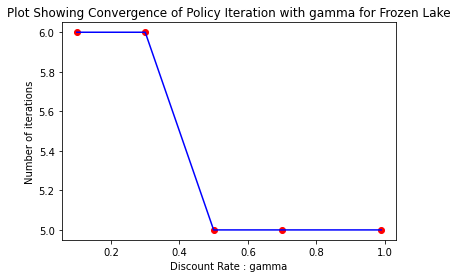

In [48]:
plt.plot(gammas, num_iterations_frozen_2,'bo', color = 'red')
plt.plot(gammas, num_iterations_frozen_2, color = 'blue')
plt.title('Plot Showing Convergence of Policy Iteration with gamma for Frozen Lake')
plt.xlabel('Discount Rate : gamma')
plt.ylabel('Number of iterations')
plt.show()

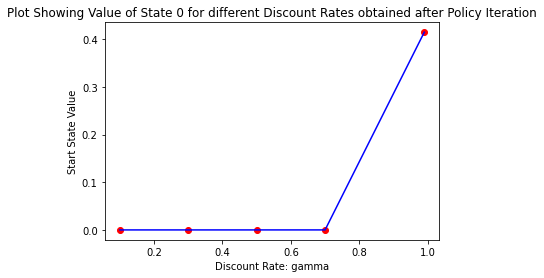

In [49]:
plt.plot(gammas, start_vals_frozen_2, 'bo', color = 'red')
plt.plot(gammas, start_vals_frozen_2, color = 'blue')
plt.title('Plot Showing Value of State 0 for different Discount Rates obtained after Policy Iteration')
plt.xlabel('Discount Rate: gamma')
plt.ylabel('Start State Value')
plt.show()

In [50]:
env_taxi_2 = gym.make("Taxi-v3", render_mode = 'ansi',new_step_api = True)

In [51]:
V_taxi_2, policy_taxi_2, iterations_taxi_2, time_taxi_2, V_old_taxi_2 = policy_iteration(env_taxi_2)

In [52]:
iterations_taxi_2

16

In [53]:
max(V_taxi_2)

955.2763819095295

In [54]:
done = None
steps = 0
state = env_taxi_2.reset()
temp = env_taxi_2.render()
print(temp[0])
while done != True:    
    steps+=1
    action = policy_taxi_2[state]
    state, reward, done, info, _ = env_taxi_2.step(policy_taxi_2[state])    
    temp = env_taxi_2.render()
    print(temp[0])
print("Number of steps used = ", steps)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|

In [55]:
policies_taxi_2 = []
num_iterations_taxi_2 = []
start_vals_taxi_2 = []
times_taxi_2 = []
prev_vals_taxi_2 = []
for gamma in gammas:
  val, policy, iterations, time_taken, val_old = policy_iteration(env_taxi_2, gamma = gamma)
  start_vals_taxi_2.append(np.max(val))
  policies_taxi_2.append(policy)
  num_iterations_taxi_2.append(iterations)
  times_taxi_2.append(time_taken)
  prev_vals_taxi_2.append(val_old)

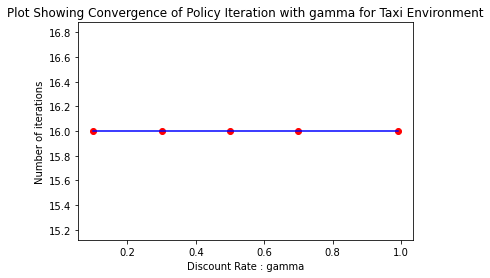

In [56]:
plt.plot(gammas, num_iterations_taxi_2,'bo', color = 'red')
plt.plot(gammas, num_iterations_taxi_2, color = 'blue')
plt.title('Plot Showing Convergence of Policy Iteration with gamma for Taxi Environment')
plt.xlabel('Discount Rate : gamma')
plt.ylabel('Number of iterations')
plt.show()

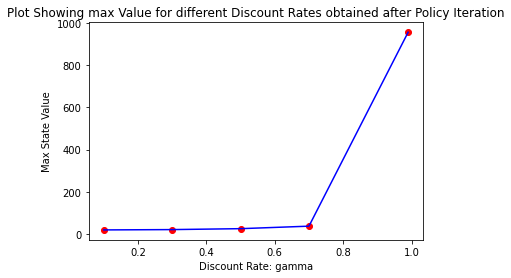

In [57]:
plt.plot(gammas, start_vals_taxi_2, 'bo', color = 'red')
plt.plot(gammas, start_vals_taxi_2, color = 'blue')
plt.title('Plot Showing max Value for different Discount Rates obtained after Policy Iteration')
plt.xlabel('Discount Rate: gamma')
plt.ylabel('Max State Value')
plt.show()

### Simultaneous Plots for Both Environments

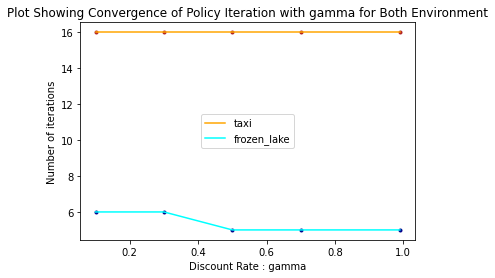

In [58]:
plt.plot(gammas, num_iterations_taxi_2,'.', color = 'firebrick')
plt.plot(gammas, num_iterations_taxi_2, color = 'orange', label = 'taxi')
plt.plot(gammas, num_iterations_frozen_2,'.', color = 'darkblue')
plt.plot(gammas, num_iterations_frozen_2, color = 'cyan', label = 'frozen_lake')
plt.title('Plot Showing Convergence of Policy Iteration with gamma for Both Environment')
plt.xlabel('Discount Rate : gamma')
plt.ylabel('Number of iterations')
plt.legend(loc = 'center')
plt.show()

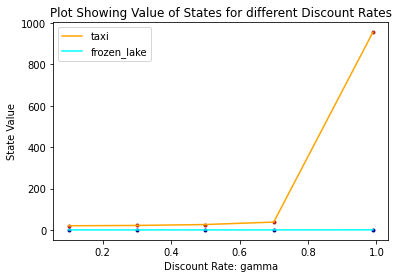

In [59]:
plt.plot(gammas, start_vals_taxi_2, '.', color = 'firebrick')
plt.plot(gammas, start_vals_taxi_2, color = 'orange', label = 'taxi')
plt.plot(gammas, start_vals_frozen_2, '.', color = 'darkblue')
plt.plot(gammas, start_vals_frozen_2, color = 'cyan', label = 'frozen_lake')
plt.title('Plot Showing Value of States for different Discount Rates')
plt.xlabel('Discount Rate: gamma')
plt.ylabel('State Value')
plt.legend(loc = "upper left")
plt.show()

## Observations From Plots
- **Comparison of Convergence (number of iterations)**
    - Number of iterations taken for convergence is almost constant. This is happening probably beacause the policy evaluation step consumes more iterations internal to the whole policy iteration algorithm.
    - However taxi environment takes more iterations than frozen lake due to a larger and complex environment
- **Comparison of State Values**:
    - As discount rate increases the value function also increases in both cases, this is as anticipated. Increase in discount factor means agent gives more weightage to future values and takes a better decision
    - However increment in taxi environment's values is more due to it having +20 reward for dropping off, unlike frozen lake which has reward of only +1 for reaching goal state.

In [60]:
all(V_old_frozen_2 == V_frozen_2) 
# comparing value functions for second last iteration with final value obtained after policy iteration
# for frozen lake env

False

In [61]:
all(V_old_taxi_2 == V_taxi_2)
# comparing value functions for second last iteration with final value obtained after policy iteration
# for taxi env

False

## Did Policies Converge Before Values?
- Looking at the algorithm of policy iteration we see the stopping criteria is **not** when the value converges but when the policy stops changing
- This suggests policies converge before values, as in policy iteration we check for strict equality of policies unlike for values where we check if values differe by an epsilon quantity in the evauation step
- **The experiments above are consistent with the theoretical claims above, that policy converges before values**

## Question 3
Q3. Between policy iteration and value iteration, which one converges early to the optimal policy in each environment? Briefly discuss this based on your observations in the previous two questions. **[5 points]**

## Comparison of Value and Policy Iteration Methods

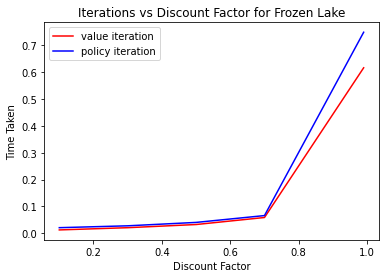

In [62]:
plt.plot(gammas, times_frozen, color = 'red', label = 'value iteration')
plt.plot(gammas, times_frozen_2, color = 'blue', label = 'policy iteration')
plt.xlabel('Discount Factor')
plt.ylabel('Time Taken')
plt.title("Iterations vs Discount Factor for Frozen Lake")
plt.legend()
plt.show()

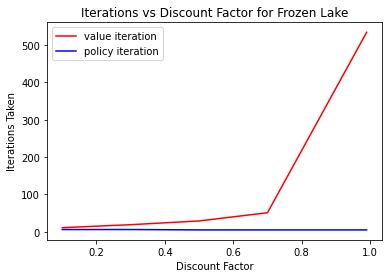

In [63]:
plt.plot(gammas, num_iterations_frozen, color = 'red', label = 'value iteration')
plt.plot(gammas, num_iterations_frozen_2, color = 'blue', label = 'policy iteration')
plt.xlabel('Discount Factor')
plt.ylabel('Iterations Taken')
plt.title("Iterations vs Discount Factor for Frozen Lake")
plt.legend()
plt.show()

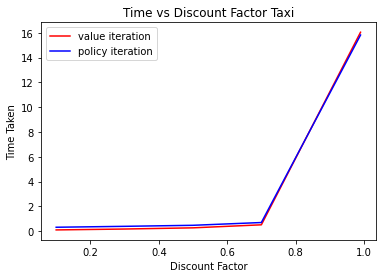

In [64]:
plt.plot(gammas, times_taxi, color = 'red', label = 'value iteration')
plt.plot(gammas, times_taxi_2, color = 'blue', label = 'policy iteration')
plt.xlabel('Discount Factor')
plt.ylabel('Time Taken')
plt.title("Time vs Discount Factor Taxi")
plt.legend()
plt.show()

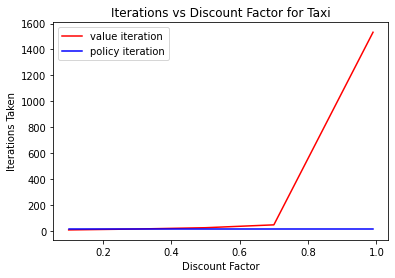

In [65]:
plt.plot(gammas, num_iterations_taxi, color = 'red', label = 'value iteration')
plt.plot(gammas, num_iterations_taxi_2, color = 'blue', label = 'policy iteration')
plt.xlabel('Discount Factor')
plt.ylabel('Iterations Taken')
plt.title("Iterations vs Discount Factor for Taxi")
plt.legend()
plt.show()

## Observations
- Policy Iteration Takes Considerablly lesser iterations than value iteration in both environments
- But we observe, the time taken by policy iteration is more than value iteration for frozen lake and almost same as value iteration in the taxi environment
- The iterations of policy iteration are less, as a huge step, policy evaluation is internal to the algorithm, and consumes many iterations and time itself
- Value Iteration uses Bellman Optimality Updates taking benefits of both policy evaluation and improvement and gives faster convergence, which is visible from the time taken

## Question 4
Q4: Impelment first-visit Monte-carlo prediction for estimating value function for FrozenLake8x8-v0. Compare the converged value function found using monte carlo prediction to that of value iteration. Show your comparison using plots and comment on the performance of Monte-carlo prediction **[15 points]**

In [66]:
def mc_prediction(env, policy, eps = 1e-12, gamma = 0.99, max_episodes = 1000):
  V = np.zeros(len(policy))
  returns = [[0, 0] for _ in range(len(policy))]
  episode = 0
  while True:
    episode +=1
#     print(f"Episode = {episode}")
#     delta = -1
    states, actions, rewards = generate_episode(env, policy)
    first_occurence = np.array([-1 for _ in range(len(policy))])
    for i,s in enumerate(states):
      if(first_occurence[s] == -1):        
        first_occurence[s] = i    
    G = 0
    T = len(rewards)
    for t in range(T-1, -1, -1):      
      G = gamma * G + rewards[t + 1 - 1]
#       print(G)
      if(t == first_occurence[states[t]]):
        returns[states[t]][0]+=1
        returns[states[t]][1]+=G
        oldVal = V[states[t]]
        V[states[t]] = returns[states[t]][1]/returns[states[t]][0]
#         delta = max(delta, abs(V[states[t]] - oldVal))
#     print(f"delta = {delta}")
#     if ((delta >=0) and ((delta < eps) or (episode == max_episodes))):
    if (episode == max_episodes):
      break;
  return V

In [67]:
def generate_episode(env, policy):
  state = env.reset()
  states = [state]
  actions = []
  rewards = []
  done = None
  while done != True:
    action = policy[int(state)]
    state, reward, done, info, _ = env.step(int(action))
    states.append(state)
    actions.append(action)
    rewards.append(reward)    
  states.pop()
  return states, actions, rewards

In [68]:
env_mc = gym.make('FrozenLake8x8-v1', new_step_api=True, render_mode = 'ansi')

In [69]:
V, num, policy, time_taken = value_iteration(env_mc, gamma = 0.9)

In [70]:
V_n = mc_prediction(env_mc, policy, gamma = 0.9)

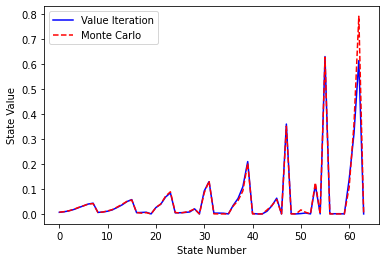

In [71]:
plt.plot(np.arange(0, 64), V, color = 'blue', label = 'Value Iteration')
plt.plot(np.arange(0, 64), V_n,'--', color = 'red', label = 'Monte Carlo')
plt.xlabel('State Number')
plt.ylabel('State Value')
plt.legend(loc = 'upper left')
plt.show()

In [72]:
V_list = []
V_mc_list = []

In [73]:
for gamma in gammas:
  V, num, policy, time_taken = value_iteration(env_mc, gamma = gamma)
  V_mc = mc_prediction(env_mc, policy, gamma = gamma)
  V_list.append(V)
  V_mc_list.append(V_mc)

In [74]:
def euclidean(a, b):
  return np.sqrt(np.sum((a - b)**2))

In [75]:
euclidean_distances = [euclidean(V_list[i], V_mc_list[i]) for i in range(len(gammas))]

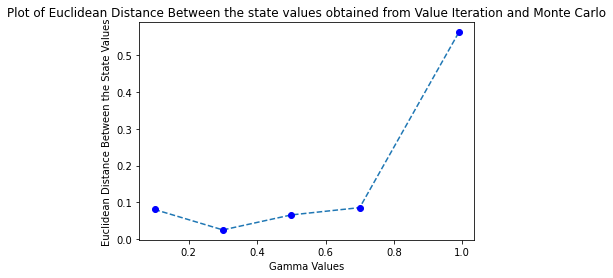

In [76]:
plt.plot(gammas, euclidean_distances, '--')
plt.plot(gammas, euclidean_distances, 'bo')
plt.title("Plot of Euclidean Distance Between the state values obtained from Value Iteration and Monte Carlo")
plt.xlabel("Gamma Values")
plt.ylabel("Euclidean Distance Between the State Values")
plt.show()

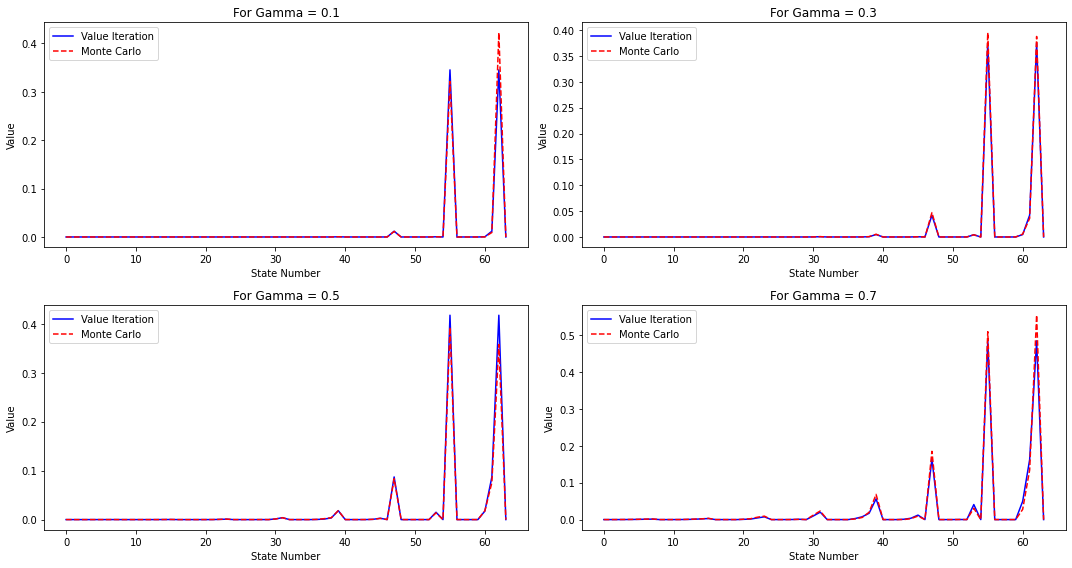

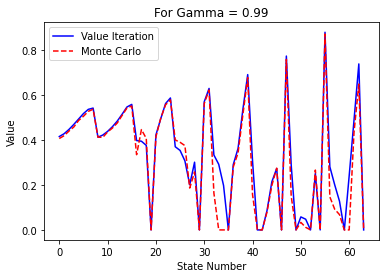

In [77]:
fig, ax = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(15)
for i, gamma in enumerate(gammas):  
  ax[i//2, i%2].plot(range(len(V_list[3])), V_list[i], color = 'blue', label = 'Value Iteration')
  ax[i//2, i%2].plot(range(len(V_list[3])), V_mc_list[i], '--', color = 'red', label = 'Monte Carlo')
  ax[i//2, i%2].set_title(f"For Gamma = {gamma}")
  ax[i//2, i%2].set_xlabel("State Number")
  ax[i//2, i%2].set_ylabel("Value")
  ax[i//2, i%2].legend()
  if i == 3:
    break
fig.tight_layout()
plt.show()

plt.plot(range(len(V_list[3])), V_list[4], color = 'blue', label = 'Value Iteration')
plt.plot(range(len(V_list[3])), V_mc_list[4], '--', color = 'red', label = 'Monte Carlo')
plt.title(f"For Gamma = {0.99}")
plt.xlabel("State Number")
plt.ylabel("Value")
plt.legend()
plt.show()

## Comments on Monte Carlo Performance
- Monte Carlo performs reasonably well for some values but poor for other, poor especially for large gamma values
- It is performing poorly for gamma = 0.99 for 1000 episodes too (not considered more as too much time was being taken to run), as can be seen from the plots and euclidean distance plot
- Compared to the max state value of around 0.41, the error in gamma = 0.99 case is significant (around 0.6, when I run it)
- We can say significant convergence has been obtained by the looking at graphs and also by the euclidean distances
- Increasing Number of episodes may help decrease the euclidean distance between monte carlo estimate and value iteration estimate (true estimate)

# Part 2:
## RL Agent playing Kaun Banega Crorepati (KBC)

Let us create an RL agent to play the KBC. We will consider that there are only 10 levels (restricting our agent to win only ₹3,20,000/- as per the 2022 KBC format). As you might be aware, at each level Mr. Amitabh Bachchan asks one question and four options are provided. If our agent answers correctly then the agent wins an amount based on the current level (it starts with ₹1,000/-). As the levels increase, the questions get tough to answer however the reward money also increases.

At every level, after answering the question correctly, our agent can decide whether to play at the next level or quit. If quit option is choosen then all the money earned so far can be kept as reward and the game ends. However, at any round if our agent chooses to play and then fails to answer correctly then all the money earned so far is lost and the game ends. The goal is to generate a policy in order to accumulate the maximum amount of money from KBC. 

Lets say the money at each level are (as per the KBC game show):

1. ₹1,000
2. ₹2,000
3. ₹3,000
4. ₹5,000
5. ₹10,000
6. ₹20,000
7. ₹40,000
8. ₹80,000
9. ₹1,60,000
10. ₹3,20,000

The probability of winning at each level is given as : 0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1 (the probability of loosing at any level can be accordingly determined)


## Questions:

1. Formulate the above problem as an MDP; mention all the key components. **[5 points]**

2. Generate an optimal policy using policy iteration (Intialize with a random policy and perform policy iteration until the policy converges). **[10 points]**

3. Print a table of V(s) value of each state for each iteration of converged policy evaluation and precisely comment on noticeable observations. **[5 points]**


## MDP Formulation:
- **The states** of MDP is the question which the player is on, if on state i, then player is yet to decide whether he should answer question i or not
- **Extra state 0 is the game over state**: game may be over on quitting, answering wrongly, or answering all correctly
- **Actions** of MDP are to decide whether player will answer(1) or quit(0)
- **Rewards** of MDP are the incremental money at each stage(according to KBC format) the player receives if answers correctly or negative reward (equal to total earned money till now) if answered wrongly
- **Initial State** is player on state 1, that is he has question 1 infront of him, he needs to decide to play or quit
- **Environment Model** is a dictionary of dictionaries where env$[state][action]$ gives a list of tuples, where each tuple tells the probability, next_state, reward_earned, terminal state(T/F).

In [78]:
rewards = [0, 1000, 2000, 3000, 5000, 10000, 20000, 40000, 80000, 160000, 320000]
reward_increments = [0, 1000, 1000, 1000, 2000, 5000, 10000, 20000, 40000, 80000, 160000]
game_lost_rewards = [0, 0]
for i in range(2, len(rewards)):
  game_lost_rewards.append(-rewards[i-1])
print(game_lost_rewards)
trans_prob = [1, 0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
print(trans_prob)

[0, 0, -1000, -2000, -3000, -5000, -10000, -20000, -40000, -80000, -160000]
[1, 0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]


In [79]:
env_kbc = {state : {} for state in range(11)}
for state in range(1, 10):
  for action in [0, 1]:
    if action == 1:
      env_kbc[state][action] = []
      success_prob = trans_prob[state]
      success_tuple = (success_prob, state + 1, reward_increments[state], False)
      fail_tuple = (1.00 - success_prob, 0, game_lost_rewards[state], True)
      env_kbc[state][action].append(success_tuple)
      env_kbc[state][action].append(fail_tuple)
    else:
      env_kbc[state][action] = []
      env_kbc[state][action].append((1.00, 0, 0, True))
                                                                        
env_kbc[0][0] = []
env_kbc[0][0].append((1.00, 0, 0, True))
env_kbc[0][1] = []
env_kbc[0][1].append((1.00, 0, 0, True))
env_kbc[10][0] = []
env_kbc[10][0].append((1.00, 0, 0, True))
env_kbc[10][1] = []
env_kbc[10][1].append((trans_prob[10], 0, reward_increments[10], True))
env_kbc[10][1].append((1.00 - trans_prob[10], 0, game_lost_rewards[10], True))

In [80]:
env_kbc

{0: {0: [(1.0, 0, 0, True)], 1: [(1.0, 0, 0, True)]},
 1: {0: [(1.0, 0, 0, True)],
  1: [(0.99, 2, 1000, False), (0.010000000000000009, 0, 0, True)]},
 2: {0: [(1.0, 0, 0, True)],
  1: [(0.9, 3, 1000, False), (0.09999999999999998, 0, -1000, True)]},
 3: {0: [(1.0, 0, 0, True)],
  1: [(0.8, 4, 1000, False), (0.19999999999999996, 0, -2000, True)]},
 4: {0: [(1.0, 0, 0, True)],
  1: [(0.7, 5, 2000, False), (0.30000000000000004, 0, -3000, True)]},
 5: {0: [(1.0, 0, 0, True)],
  1: [(0.6, 6, 5000, False), (0.4, 0, -5000, True)]},
 6: {0: [(1.0, 0, 0, True)],
  1: [(0.5, 7, 10000, False), (0.5, 0, -10000, True)]},
 7: {0: [(1.0, 0, 0, True)],
  1: [(0.4, 8, 20000, False), (0.6, 0, -20000, True)]},
 8: {0: [(1.0, 0, 0, True)],
  1: [(0.3, 9, 40000, False), (0.7, 0, -40000, True)]},
 9: {0: [(1.0, 0, 0, True)],
  1: [(0.2, 10, 80000, False), (0.8, 0, -80000, True)]},
 10: {0: [(1.0, 0, 0, True)],
  1: [(0.1, 0, 160000, True), (0.9, 0, -160000, True)]}}

# Optimal Policy Generation and Code

In [81]:
class kbc:
  def __init__(self, env, num_states, num_actions):
    self.env = env
    self.num_states = num_states
    self.num_actions = num_actions
    self.kbc_vals_list = []
  def kbc_policy_iteration(self, gamma = 0.99, eps = 1e-12, max_iterations = 100000):
    start_time = time.time();
    V = np.zeros(self.num_states)
    np.random.seed(0)
    policy = np.random.choice(self.num_actions, self.num_states)
    policy_stable = False
    iterations = 0;    
    while policy_stable == False and iterations < 100000:
      iterations = iterations + 1
      V, _ = self.kbc_policy_evaluation(V, policy, gamma = gamma, eps = eps)
      temp = V.copy()
      self.kbc_vals_list.append(temp)      
#       print(_)
      policy, policy_stable = self.kbc_policy_improvement(V, policy, policy_stable, gamma = gamma)
    end_time = time.time();
    return V, policy, iterations, (end_time - start_time)
  def kbc_policy_evaluation(self, V, policy, gamma = 0.99, eps = 1e-12, max_iterations = 100000): 
    for iteration in range(max_iterations):
      delta = 0
      for i in range(self.num_states):
        v = V[i]
        expectedReturn = 0            
        action = policy[i]
        for possibility in self.env[i][action]:
          prob   = possibility[0]
          s_     = possibility[1]
          reward = possibility[2]
          expectedReturn += prob * (reward + gamma * V[s_])
        V[i] = expectedReturn
        delta = max(delta, abs(v - V[i]))
      if delta < eps:      
        break
    return V, iteration + 1
  def kbc_policy_improvement(self, V, policy, policy_stable, gamma = 0.99):
    policy_stable = True
    for i in range(self.num_states):
      old_action = policy[i]
      new_val = float('-inf')
      for action in range(self.num_actions):
        expected_return = 0
        for possibility in self.env[i][action]:
          prob   = possibility[0]
          s_     = possibility[1]
          reward = possibility[2]
          expected_return += prob * (reward + gamma * V[s_])
        if(expected_return > new_val):
          new_val = expected_return
          policy[i] = action
      if(old_action != policy[i]):
        policy_stable = False  
    return policy, policy_stable

In [82]:
kbc_env = kbc(env_kbc, 11, 2)

In [83]:
V, policy, iterations, time_taken = kbc_env.kbc_policy_iteration(gamma = 0.99, eps = 1e-12)

In [84]:
V

array([   0.        , 2948.50118875, 1998.266696  , 1344.856     ,
       1193.        , 1000.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ])

In [85]:
iterations

3

In [86]:
policy

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

### Policy Says to Keep Answering Questions till Question number 5, and quit on question 6 (assuming the kbc money reward is incremental and not such that each question gives separate money)

In [87]:
df = pd.DataFrame(kbc_env.kbc_vals_list)
df = df.rename_axis('State', axis = 1)
df = df.rename_axis("Iteration", axis = 0)

In [88]:
df

State,0,1,2,3,4,5,6,7,8,9,10
Iteration,,,,,,,,,,,
0,0.0,1774.080000,800.000000,0.000,-2670.777436,-4575.436415,-9386.256591,-18962.134528,-37783.168,-73344.0,-128000.0
1,0.0,1774.080000,800.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0
2,0.0,2948.501189,1998.266696,1344.856,1193.000000,1000.000000,0.000000,0.000000,0.000,0.0,0.0


## Observations from above dataframe of converged policy evaluation values over different iterations of policy iteration
- Initially, the states from 3 to 10 had non-positive values, which improved over the iterations as the policy was refined
- Even the state values for already positive states improved
- As said before, policy converged faster, than value of states, which is visible from value changing till last iteration unlike policy which stabilized on second last iteration

# Part - 3
## Managing a Warehouse

Assume, you are the manager of a warehouse where you need to keep the inventory of the stocks as per the expected customer demand.  For simplicity, let's assume you manage maximum 15 units of only 1 product in the warehouse . At the end of each day, you look at the stock in hand $s_t$. The decision to order additional units of the product is then made at the end of every day and the delivery happens by next day early morning. 

The demand for the product arrives throughtout the day which is immediately serviced. Products are sold in whole units. The total demand thoughout the day is Poisoon distributed with mean rate of 5 units. In case, the demand exceeds the inventory, the extra demand is lost.

There is a fixed cost K=5 and a variable cost $c(u) = 2u$ for placing an order of $u$ units ($C(u) = K+c(u)$, if $u=0$ then $C(u) = 0$). Further, there is a holding cost $h(u) = u$ for each item in inventory at the end of the day. For each unit sold, the revenue is $f(u) = 8u$.

The reward function over the current state and action $(s,a)$ is given as:

$ r_t(s, a) = F(s+a) - C(a) - h(s+a)$

where, $F(u)$ is the expected revenue from the available units $u$ given as:

$F(u) = ∑_{j=0}^{u-1} f(j)p_j + f(u)q_u$

$q_u = \sum_{j=u}^{∞}p_j$ \\
$q_u$ is the probability with which demand exceeds the inventory

The transition probability is given as:

$
T(j|s,a)  =\left\{
\begin{align} 
            &  0, \text{if}~ j>s+a \\
            & p_{s+a-j}, \text{if}~ s+a \geq j > 0 \\
            & q_{s+a}, \text{if}~  j = 0 
\end{align}
\right.
$


# Questions

1. Formulate the above problem as an MDP; mention all the key components and Print the reward and transition matrix. [5 points]

2. Run value iteration to find a policy for optimal ordering of the stocks in order to maximize the revenue. [10 points]

3. Make a table for each iteration of value iteration mentioning the gap between successive value vectors and maximum value function of a state in that iteration. Print the final policy that your model finds. [5 marks]


## MDP Formulation:
- **States** of MDP will be number of available units at end of any day
- **Action** would be to order certain number of units. The action would transition us to end of next day, where we could have various possibilities of units left depending on number of customers on that day
- **Reward** would be determined by the reward function given straightforwardly
- **Initial State** is assumed to be starting with 0 units at end of day, though it won't affect the state values
- **Transition Function** values too are calculated according to given formula
- The **transition function** values along with rewards are stored in a dictionary of dictionaries as is done in openai gym
    - The value env_model$[state][action]$ contains list of tuples
    - Each tuple consists of $(transition  Probability, the Next State, reward)$
    - the reward is same for a particular starting state, action pairs (irrespectiveof destination state) as mentioned in the question, but different for different pairs

In [89]:
def poisson(k, lamb = 5):  
  return max(((np.power(lamb, k) * np.exp(-1 * lamb))/(np.math.factorial(k))), 0)
def q(u):  
  # doing 1 - sum for states less than u to get infinite sum from u to infinity
  if(u == 0):
    return 1
  qu = 0
  j = u-1  
  while True:    
    pj = poisson(j)
    qu += pj
    j-=1
    if(j == -1):
      break
  return 1 - qu
def F(u):
  Fu = 0
  for j in range(0, u):
    Fu +=(8 * j) * poisson(j)
  Fu += 8 * u * q(u)
  return Fu
def C(u):
  if u == 0:
    return 0
  return 5 + 2 * u
def h(u):
  return u
def get_reward(s, a):
  return F(s + a) - C(a) - h(s + a)

In [90]:
def T(j, s, a):
  if j > (s + a):
    return 0
  if (j > 0) and (j <= (s + a)):
    return poisson(s + a - j)
  if j == 0:
    return q(s + a)

In [91]:
env_model = {state : {} for state in range(16)}

In [92]:
for state in range(0, 16):  
  for action in range(0, 16-state):
    env_model[state][action] = []
    for s_ in range(0, 16):
      result = (T(s_, state, action), s_, get_reward(state, action))
      env_model[state][action].append(result)

## Transition Values Cum Reward Function, can be read from the dictionary of dictionaries as described above

In [93]:
env_model

{0: {0: [(1, 0, 0),
   (0, 1, 0),
   (0, 2, 0),
   (0, 3, 0),
   (0, 4, 0),
   (0, 5, 0),
   (0, 6, 0),
   (0, 7, 0),
   (0, 8, 0),
   (0, 9, 0),
   (0, 10, 0),
   (0, 11, 0),
   (0, 12, 0),
   (0, 13, 0),
   (0, 14, 0),
   (0, 15, 0)],
  1: [(0.9932620530009145, 0, -0.053903575992683805),
   (0.006737946999085467, 1, -0.053903575992683805),
   (0, 2, -0.053903575992683805),
   (0, 3, -0.053903575992683805),
   (0, 4, -0.053903575992683805),
   (0, 5, -0.053903575992683805),
   (0, 6, -0.053903575992683805),
   (0, 7, -0.053903575992683805),
   (0, 8, -0.053903575992683805),
   (0, 9, -0.053903575992683805),
   (0, 10, -0.053903575992683805),
   (0, 11, -0.053903575992683805),
   (0, 12, -0.053903575992683805),
   (0, 13, -0.053903575992683805),
   (0, 14, -0.053903575992683805),
   (0, 15, -0.053903575992683805)],
  2: [(0.9595723180054871, 0, 4.6226749680512125),
   (0.03368973499542734, 1, 4.6226749680512125),
   (0.006737946999085467, 2, 4.6226749680512125),
   (0, 3, 4.62267496805

In [94]:
def new_value_iteration(env, max_iterations=100000, gamma=0.99, eps = 1e-12):  
  V_list = []
  start_time = time.time()
  V = np.zeros(16)
  for iteration in range(max_iterations):    
    delta = 0
    for i in range(len(V)):
      v = V[i]
      newVal = -1;
      for action in list(env[i].keys()):
        expected_reward = 0
        for possibility in env[i][action]:
          prob = possibility[0]
          s_ = possibility[1]
          r  = possibility[2]      
          expected_reward += prob * (r + gamma * V[s_])
        newVal = max(newVal, expected_reward)        
      V[i] = newVal
      delta = max(delta, abs(v - V[i]))
    V_list.append(V.copy())
    if delta < eps:
      break
  policy = new_get_policy(env, V, gamma)
  end_time = time.time()
  return V, iteration + 1, policy, end_time - start_time, V_list

In [95]:
def new_get_policy(env, V, gamma=0.99):
  pi = np.zeros(16)
  for i in range(16):
    v = V[i]
    newVal = -1
    policyAction = None
    for action in list(env[i].keys()):
      expected_reward = 0
      for possibility in env[i][action]:
        prob = possibility[0]
        s_ = possibility[1]
        r  = possibility[2]        
        expected_reward += prob * (r + gamma * V[s_])
      if expected_reward > newVal:
        newVal = expected_reward
        policyAction = action
    pi[i] = policyAction
  return pi

In [96]:
V, iterations, policy, time_taken, V_list = new_value_iteration(env_model)

In [97]:
V

array([1719.70180193, 1721.70180193, 1723.70180193, 1725.70180193,
       1727.87614865, 1732.2460023 , 1735.640802  , 1738.32537693,
       1740.60892485, 1742.70180193, 1744.67430606, 1746.50415115,
       1748.14592683, 1749.57242203, 1750.78023883, 1751.77961307])

In [98]:
iterations

1657

In [99]:
policy

array([9., 8., 7., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
time_taken

2.9128167629241943

In [101]:
diff_V = [euclidean(V_list[0], np.zeros(len(V_list[0])))]

In [102]:
for i in range(1, len(V_list)):
  diff_V.append(euclidean(V_list[i], V_list[i-1]))

In [103]:
max_V = [max(V_list[i]) for i in range(len(V_list))]

In [104]:
df = pd.DataFrame(zip(diff_V, max_V), columns=['Euclidean Dist With prev', 'Max Value'])

In [105]:
df = df.rename_axis('Iteration')

In [106]:
df

,Euclidean Dist With prev,Max Value
Iteration,,
0,2.624189e+02,98.972057
1,1.983143e+02,148.258365
2,1.920242e+02,195.559238
3,1.855022e+02,241.251446
4,1.792015e+02,285.391690
...,...,...
1652,2.145039e-12,1751.779613
1653,3.566217e-12,1751.779613
1654,3.500373e-12,1751.779613


## We observe from above table that as iterations increase the max value increases and the distance between successive state values decreases, which is totally in agreement with the idea of convergence (for decreasing distance and increasing(refining) values)

In [107]:
policy

array([9., 8., 7., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Final Policy of Model is to buy stock of 9, 8, 7, 6 when we have 0, 1, 2, 3 stocks left at end of day and buy nothing else in other states